## **Comparison of Clustering Algorithms**

In [ ]:
# run this cell if you're using Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
  import sys
  import os
  !git clone https://github.com/satishchandrareddy/UnsupervisedML.git
  code_location = "/content/UnsupervisedML/Code/Clustering"
  sys.path.append(os.path.abspath(code_location))

In [1]:
import create_data_cluster_sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import kmeans
import dbscan
import gaussianmm

## **Generate Datasets**

In [2]:
np.random.seed(31)
cases = ["noisy_circles", "noisy_moons", "blobs", "aniso", "varied_blobs1"]
nsample = 1500
scaler = StandardScaler()
X = {case : scaler.fit_transform(create_data_cluster_sklearn.create_data_cluster(nsample, case).T).T for case in cases}

Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500


## **Define the Models**

In [3]:
models = {
    'K-Means': [kmeans.kmeans(ncluster=2, initialization='kmeans++'),
               kmeans.kmeans(ncluster=3, initialization='kmeans++')],
    'DBSCAN': [dbscan.dbscan(epsilon=0.3, minpts=3), 
              dbscan.dbscan(epsilon=0.18, minpts=5),
              dbscan.dbscan(epsilon=0.15, minpts=20)],
    'GaussianMM': [gaussianmm.gaussianmm(ncluster=2, initialization='kmeans++'),
                   gaussianmm.gaussianmm(ncluster=3, initialization='kmeans++')]    
}

## **Train Models and Plot Resulting Clusters for Comparison**

Iteration: 0  Objective Function: 2598.5706238435296
Iteration: 1  Objective Function: 1968.3085535027892
Iteration: 2  Objective Function: 1921.7147297654028
Iteration: 3  Objective Function: 1909.899260808967
Iteration: 4  Objective Function: 1906.772775021498
Iteration: 5  Objective Function: 1906.211993489113
Iteration: 6  Objective Function: 1906.207759462187
Iteration: 1 - Log Likelihood Function: -4839.268568022975
Iteration: 2 - Log Likelihood Function: -4208.296973034532
Iteration: 3 - Log Likelihood Function: -4204.6860931959545
Iteration: 4 - Log Likelihood Function: -4203.256166533428
Iteration: 5 - Log Likelihood Function: -4202.532319811697
Iteration: 6 - Log Likelihood Function: -4202.146770064657
Iteration: 7 - Log Likelihood Function: -4201.912341405108
Iteration: 8 - Log Likelihood Function: -4201.741697830985
Iteration: 9 - Log Likelihood Function: -4201.59811331572
Iteration: 10 - Log Likelihood Function: -4201.467092315158
Iteration: 11 - Log Likelihood Function: -

Iteration: 29 - Log Likelihood Function: -3821.828090822227
Iteration: 30 - Log Likelihood Function: -3821.757342262913
Iteration: 31 - Log Likelihood Function: -3821.6835615069735
Iteration: 32 - Log Likelihood Function: -3821.60651425134
Iteration: 33 - Log Likelihood Function: -3821.5259461575306
Iteration: 34 - Log Likelihood Function: -3821.441580825675
Iteration: 35 - Log Likelihood Function: -3821.353117523192
Iteration: 36 - Log Likelihood Function: -3821.260228626424
Iteration: 37 - Log Likelihood Function: -3821.1625567231313
Iteration: 38 - Log Likelihood Function: -3821.059711310324
Iteration: 39 - Log Likelihood Function: -3820.951265004349
Iteration: 40 - Log Likelihood Function: -3820.8367491571826
Iteration: 41 - Log Likelihood Function: -3820.7156487429556
Iteration: 42 - Log Likelihood Function: -3820.5873963396148
Iteration: 43 - Log Likelihood Function: -3820.4513649796263
Iteration: 44 - Log Likelihood Function: -3820.306859577168
Iteration: 45 - Log Likelihood Fun

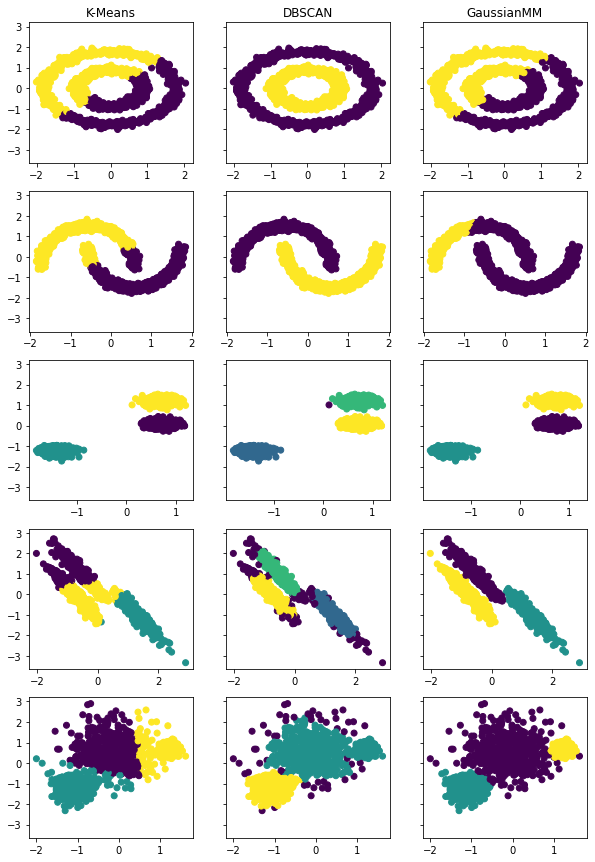

In [4]:
fig, axes = plt.subplots(len(X), len(models), figsize=(10,15), sharey=True)
for i,data in enumerate(X.items()):
  for j,model in enumerate(models.items()):
    np.random.seed(31)
    if i == 0:
      axes[i,j].set_title(model[0])
    if data[0] == 'noisy_circles' or data[0] == 'noisy_moons':
      mod = model[1][0]
    elif data[0] == 'aniso' and model[0] == 'DBSCAN':
      mod = model[1][2]
    else:
      mod = model[1][1]
    if model[0] == 'DBSCAN':
      mod.fit(data[1])
    else:
      niter = 100
      mod.fit(data[1], niter)
    labels = mod.clustersave[-1]
    #labels = mod.labels_ if model[0] == 'DBSCAN' else mod.clustersave[-1]
    axes[i,j].scatter(data[1][0,:], data[1][1,:], c=labels)
    
plt.show()